#Decaimiento Radioactivo

##Importación de librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import ode, odeint

#Resorte

##Resolver la ecuación diferencial

In [55]:
def spring(p, t):
    x, v = p
    return [v, (-1/0.2)*x]
    
ivs = [np.random.uniform(-10,10,size=(1,2)) for i in range(20)]
sols= [np.transpose(odeint(spring, i[0], np.linspace(0,100,100))) for i in ivs]

#Graficar los puntos solución

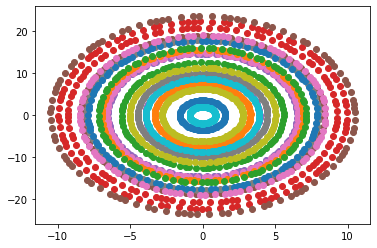

In [58]:
for i in range(len(sols)):
  plt.scatter(sols[i][0], sols[i][1])


#Decaimiento radioactivo

##Lectura de los datos

In [16]:
data = pd.read_json("https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json")

##Establecimiento de funciones

In [24]:
decay = lambda t,τ: 1000*np.exp((-np.log(2)/τ)*t)
decay = np.vectorize(decay)

##Fitting

In [21]:
popt, pcov = curve_fit(decay, data['t'], data['N(t)'])
ran = np.linspace(data.t[0], data.t[:-1])

##Vida media del estroncio

In [36]:
print(f'La vida media del Estroncio es de {popt[0]:.0f} años mas o menos {np.sqrt(np.diag(pcov))[0]*12:.0f} meses')

La vida media del Estroncio es de 28 años mas o menos 5 meses


##Graficación

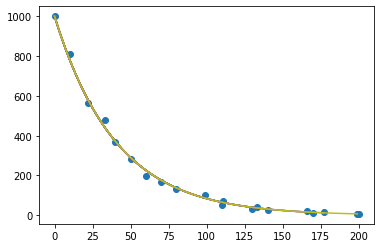

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data['t'], data['N(t)'])
ax.plot(ran, decay(ran, popt[0]))
plt.xlabel('Tiempo [años]')
plt.ylabel('# de núcleos')
ax.set_title('Decaimiento radioactivo del Estroncio')
plt.show()